# `Contextily` & `LeafMap`: Visualizating GeoSpatial Data

1. [x] **Introduction**
    - Brief introduction to Contextily and Leafmap
    - Installation instructions
2. [x] **Contextily**
    - Introduction to basemaps and tile providers
    - Adding basemaps to GeoPandas plots
    - Converting coordinate reference systems for compatibility
    - Caching and custom tile providers
3. [x] **Leafmap**
    - Introduction to interactive mapping with Leafmap
    - Creating a basic Leafmap map
    - Adding geometries (points, lines, polygons) to the map
    - Adding GeoDataFrames to the map
    - Styling and customization
    - Using built-in tools (e.g., layer control, measure, drawing, etc.)
4. [x] **Working with Raster Data in Leafmap**
    - Adding raster data to the map
    - Raster layer styling and customization
    - Raster layer operations (e.g., clipping)
5. [x] **Links to Contextily and Leafmap documentation, relevant tutorials, and other resources for learners to explore further**

# Introduction

In this notebook, we will explore two Python libraries, `Contextily` and `Leafmap`, that can be used for creating beautiful and interactive maps with geospatial data.

- **Contextily**: A library that allows you to add **basemaps** to your geospatial plots. It provides a simple interface to access different tile providers, cache tiles, and convert coordinate reference systems for compatibility.
- **Leafmap**: A library built on top of **Folium**, **ipyleaflet**, and other mapping libraries, which simplifies the process of creating interactive maps with Python. It provides a wide range of tools for adding geometries, raster data, and `GeoDataFrames` to maps, as well as styling and customization options.

In the following sections, we will learn about the features and functionalities of these libraries, and see how to create visually appealing and interactive maps with geospatial data in Python.

### Installation

To install Contextily and Leafmap, you can use the following commands with either `pip` or `conda`.

Using pip:
```bash
pip install contextily
pip install leafmap
```

... or conda:

```bash
conda install -c conda-forge contextily
conda install -c conda-forge leafmap
```

In [1]:
from IPython.core.debugger import set_trace
from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import rasterio as rio
from rasterio.plot import reshape_as_image

In [2]:
import leafmap
import contextily as ctx
ctx.set_cache_dir("/Users/akramz/.cache/")

## Contextily

Contextily is a Python library that makes it easy to add basemaps to your geospatial plots. It provides a simple interface to access different tile providers, cache tiles, and convert coordinate reference systems for compatibility. In this section, we'll explore how to use Contextily to enhance your GeoPandas plots with basemaps.

### Introduction to basemaps and tile providers

**A basemap is a background map layer that provides context for the main data layers displayed on top of it**. **Basemaps often include features like roads, rivers, and administrative boundaries**, which help users understand the geography of the area being displayed.

**Tile providers are web services that serve map tiles, which are small images that make up the basemap**. Different tile providers offer different styles and levels of detail. Contextily provides access to several popular tile providers, such as OpenStreetMap, Stamen, and CartoDB.

To see the list of available tile providers in Contextily, you can use the `ctx.providers` object:

In [3]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<ins

### Adding basemaps to GeoPandas plots

To add a basemap to a GeoPandas plot, you first need to create a regular plot of your `GeoDataFrame`, and then use `Contextily` to add the basemap. 

Let's start by importing the necessary libraries and loading a sample GeoDataFrame.

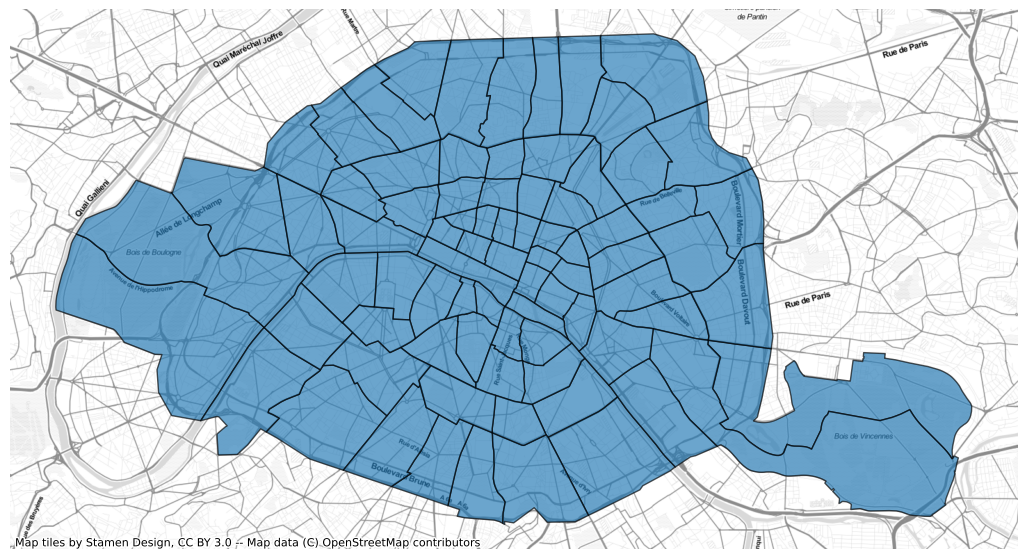

In [4]:
# Load a sample GeoDataFrame (replace the file path with your own data if needed)
gdf = gpd.read_file("./data/vector/quartier_paris.geojson")

# Ensure the GeoDataFrame is in Web Mercator (EPSG:3857) CRS for compatibility with Contextily basemaps
gdf = gdf.to_crs(epsg=3857)

# Plot the GeoDataFrame
ax = gdf.plot(figsize=(13, 10), alpha=.66, edgecolor='k')

# Add the basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.Stamen.TonerLite)

# Display the map
ax.set_axis_off()

### Converting coordinate reference systems for compatibility

Contextily basemaps are usually provided in the Web Mercator projection (`EPSG:3857`). To ensure compatibility between your data and the basemap, you should convert your GeoDataFrame to the same coordinate reference system (CRS) before plotting. You can use the `to_crs()` method in GeoPandas for this purpose:

```python
gdf = gdf.to_crs(epsg=3857)
```

### Caching and custom tile providers

Contextily automatically caches the downloaded tiles to save bandwidth and improve performance. The cache is stored in a temporary directory, but you can specify a custom cache directory by setting the ctx.options.cache_path attribute:

In [5]:
ctx.set_cache_dir("/Users/akramz/.cache/")

If you want to use a custom tile provider, you can directly provide the URL:

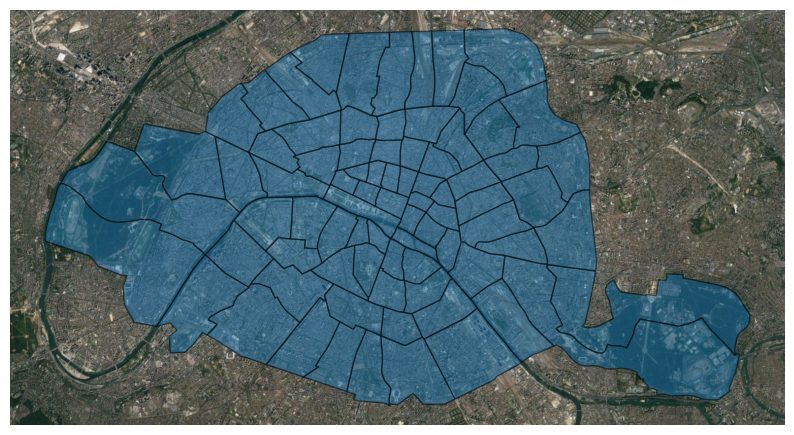

In [6]:
# Plot the GeoDataFrame
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Add the custom basemap
ctx.add_basemap(ax, source="http://www.google.cn/maps/vt?lyrs=s@189&gl=cn&x={x}&y={y}&z={z}")

# Display the map
ax.set_axis_off()

## Leafmap

`Leafmap` is a Python library that makes it easy to create interactive web maps using the popular Leaflet JavaScript library. 

With `Leafmap`, you can create and display interactive maps with various basemap providers, add vector data, and perform geospatial operations, all within a Jupyter notebook or standalone Python script. 

In this section, we'll explore how to create interactive maps using Leafmap and add data from `GeoPandas`.

### Creating an interactive map

To create an interactive map with Leafmap, you first need to import the library and create a `Map` object. You can customize the initial view of the map by setting the center coordinates and zoom level. Here's an example of how to create a simple interactive map:

In [7]:
# Create a Map object
m = leafmap.Map(center=[0, 0])

# Display the map
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

### Adding GeoPandas data to a Leafmap map

To add data from a GeoDataFrame to a Leafmap map, you can use the `add_gdf()` method. This method takes your GeoDataFrame as input and adds it as a vector layer on the map. Make sure your GeoDataFrame is in the WGS 84 (EPSG:4326) CRS for compatibility with Leafmap. Here's an example of how to add a GeoDataFrame to a Leafmap map:

In [8]:
# Load a sample GeoDataFrame (replace the file path with your own data if needed)
gdf = gpd.read_file("./data/vector/quartier_paris.geojson")

# Ensure the GeoDataFrame is in WGS 84 (EPSG:4326) CRS for compatibility with Leafmap
gdf = gdf.to_crs(epsg=4326)

# Pick a map center from the centroids
center = gdf.centroid.sample(1).iloc[0]

# Create a Map object
m = leafmap.Map(center=[center.x, center.y], zoom=13)

# Add the GeoDataFrame to the map
m.add_gdf(gdf, layer_name="My Layer")

# Display the map
m

Map(center=[2.352433149542819, 48.823127805674275], controls=(ZoomControl(options=['position', 'zoom_in_text',…

### Customizing map appearance and interactions

`Leafmap` offers various options to customize the appearance and interactions of your map. You can change the `basemap`, add `map controls`, and `style` your vector data. 

Here's an example of how to customize a Leafmap map:

In [9]:
# Pick a map center from the centroids
center = gdf.centroid.sample(1).iloc[0]

# Create a Map object
m = leafmap.Map(center=[center.x, center.y], zoom=13)

# Load a sample GeoDataFrame (replace the file path with your own data if needed)
gdf = gpd.read_file("./data/vector/paris_districts_utm.geojson")

# Ensure the GeoDataFrame is in WGS 84 (EPSG:4326) CRS for compatibility with Leafmap
gdf = gdf.to_crs(epsg=4326)

# Define a custom style for the vector layer
style = {
    "stroke": True,
    "color": "black",
    "weight": 1,
    "opacity": 1,
    "fill": True,
    "fillColor": "white",
    "fillOpacity": .66
}

# Add the GeoDataFrame to the map with the custom style
m.add_gdf(gdf, layer_name="Layer", style=style)

# Display the map
m

Map(center=[2.3632050573309633, 48.8591924127139], controls=(ZoomControl(options=['position', 'zoom_in_text', …

## Working with Raster Data in Leafmap

Leafmap also supports working with raster data. In this section, we will cover:

- Adding raster data to the map
- Raster layer styling and customization
- Raster layer operations, such as clipping

### Adding Raster Data to the Map

In [10]:
# Load the raster data (replace the file path with your own data if needed)
raster_file = "./data/raster/kenya_elevation.tif"

# Open the raster data using rasterio
with rio.open(raster_file) as src:
    
    # Read all raster bands as a NumPy array
    raster_data = src.read()
    
    # Get the raster transform and crs
    transform = src.transform
    crs = src.crs
    
    # Get the bounds
    xmin, ymin, xmax, ymax = tuple(src.bounds)

In [11]:
# Convert the raster data to an image (H, W, B)
raster_image = reshape_as_image(raster_data)
raster_image.shape

(3601, 3601, 1)

In [18]:
# Create a map object centered on the raster data
m = leafmap.Map(center=((ymin+ymax)/2, (xmin+xmax)/2), zoom=8)
m

Map(center=[-1.5, 36.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

We now add the raster image to the map:

In [19]:
# Add the raster data as an ImageOverlay to the map
m.add_raster(raster_file, opacity=.75)

## Additional Resources and Further Reading

To learn more about Contextily and Leafmap, you can explore the following resources:

1. Contextily documentation: [https://contextily.readthedocs.io](https://contextily.readthedocs.io)
2. Contextily GitHub repository: [https://github.com/darribas/contextily](https://github.com/darribas/contextily)
3. Leafmap documentation: [https://leafmap.org](https://leafmap.org)
4. Leafmap GitHub repository: [https://github.com/giswqs/leafmap](https://github.com/giswqs/leafmap)
5. Leaflet JavaScript library: [https://leafletjs.com](https://leafletjs.com)
6. Contextily tutorial: [https://geopandas.org/gallery/plotting_basemap_background.html](https://geopandas.org/gallery/plotting_basemap_background.html)

---